In [1]:
import numpy as np
import pandas as pd
import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

/var/folders/kb/sw0dnpps1cx45xw8zvrdypc80000gq/T/ipykernel_1689/1937371876.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE_TDpred2024/data/complete_data/archiva.csv")
df

In [2]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE_TDpred2024/data/biweekly_data/archiva.csv")
df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-11-28 03:15:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2005-12-12 08:09:34,4540.0,0.0,2.0,0.0,2.0,1.0,0.0,15.0,9.0,0.0,0.0,4.0,0.0,0.0,39.0,20.0
2,2005-12-27 02:34:36,6607.0,0.0,5.0,0.0,3.0,1.0,0.0,33.0,9.0,0.0,0.0,4.0,3.0,0.0,45.0,8.0
3,2006-01-15 00:30:24,5929.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0
4,2006-01-30 02:51:46,7754.0,0.0,17.0,0.0,1.0,0.0,0.0,1.0,10.0,0.0,9.0,6.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2011-12-19 22:38:00,108851.0,17.0,142.0,7.0,0.0,24.0,12.0,68.0,136.0,18.0,108.0,10.0,3.0,2.0,41.0,15.0
132,2012-01-04 08:49:50,110243.0,17.0,142.0,8.0,0.0,34.0,12.0,68.0,145.0,18.0,112.0,10.0,3.0,2.0,52.0,15.0
133,2012-01-18 13:43:23,110861.0,17.0,142.0,8.0,0.0,34.0,12.0,68.0,146.0,18.0,112.0,10.0,3.0,2.0,52.0,15.0
134,2012-02-02 20:39:36,121632.0,17.0,142.0,8.0,0.0,34.0,12.0,70.0,152.0,18.0,110.0,10.0,3.0,2.0,52.0,15.0


In [10]:
df.columns[1:]

Index(['SQALE_INDEX', 'S1213', 'RedundantThrowsDeclarationCheck', 'S00117',
       'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks',
       'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481'],
      dtype='object')

# Trying auto_arima

In [4]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/monthly_data/felix.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index))
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [98]:
def optimal_d(series, max_d=3):
    """Determine optimal d by checking stationarity with ADF test."""
    for d in range(max_d + 1):
        adf_result = adfuller(np.diff(series,n=d))
        p_value = adf_result[1]
        print(p_value)
        if p_value < 0.05:  # Series is stationary
            return d
    return max_d

optimal_d(sqale_index)

0.9967077308437747
3.8106766471530434e-05


1

In [95]:
sqale_index

array([ 25998.,  26244.,  26490.,  25141.,  28171.,  26317.,  22667.,
        47372.,  56041.,  64022.,  79151.,  79602.,  96367.,  82848.,
        83558.,  83761.,  84040.,  84371.,  89351.,  89872.,  89400.,
        93054.,  95090.,  99519., 100268., 100376., 100718., 105275.,
       113126., 163907., 181760., 183540., 192623., 198636., 206333.,
       215808., 224951., 227954., 225041., 227013., 230897., 246986.,
       253394., 283530.])

In [29]:
df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-08-16 18:33:34,25998.0,25.0,21.0,34.0,49.0,9.0,34.0,4.0,45.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
1,2005-09-15 18:33:34,26244.0,25.0,21.0,34.0,49.5,9.0,34.5,5.0,47.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
2,2005-10-30 07:47:41,26490.0,25.0,21.0,34.0,50.0,9.0,35.0,6.0,49.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
3,2005-12-03 16:32:50,25141.0,26.0,22.0,34.0,49.0,9.0,34.0,4.0,49.0,72.0,69.0,18.0,19.0,25.0,24.0,5.0
4,2006-01-13 13:55:13,28171.0,64.0,22.0,42.0,57.0,9.0,35.0,4.0,49.0,73.0,70.0,18.0,19.0,26.0,39.0,5.0
5,2006-02-13 15:46:16,26317.0,60.0,20.0,40.0,58.0,6.0,36.0,7.0,45.0,78.0,71.0,17.0,16.0,26.0,40.0,5.0
6,2006-03-16 15:57:37,22667.0,61.0,26.0,15.0,65.0,6.0,19.0,7.0,38.0,77.0,51.0,20.0,21.0,14.0,38.0,2.0
7,2006-04-19 14:43:32,47372.0,91.0,31.0,58.0,128.0,13.0,22.0,12.0,77.0,94.0,96.0,38.0,43.0,34.0,137.0,9.0
8,2006-05-24 07:42:30,56041.0,105.0,36.0,62.0,139.0,15.0,24.0,20.0,97.0,101.0,103.0,43.0,48.0,41.0,183.0,10.0
9,2006-06-24 15:03:17,64022.0,111.0,38.0,63.0,266.0,18.0,29.0,20.0,118.0,117.0,107.0,45.0,45.0,53.0,230.0,10.0


In [ ]:
arima_model = pmd.arima.auto_arima(y=training_sqale, X=training_xregressors, start_p=0, start_q=0, max_p=5, max_q=5, d=1, D=1, max_d=3, max_D=3, start_P=0, start_Q=0, max_P=5, max_Q=5, test="adf", m=12, seasonal=True, stepwise=False, enforce_stationarity=True, error_action='trace', trace=True, suppress_warnings=False, stationary=False)

In [109]:
arima_model

AttributeError: 'ARIMA' object has no attribute 'mle_retvals'

In [108]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -391.794
Date:                Thu, 15 Feb 2024   AIC                            815.587
Time:                        16:57:04   BIC                            843.766
Sample:                             0   HQIC                           825.979
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -41.2569     20.388     -2.024      0.043     -81.216      -1.298
x2            21.0786     62.000      0.340      0.734    -100.439     142.596
x3            81.8755     22.120      3.701      0.0

In [65]:
adfuller(np.log(training_sqale))

(-1.0707250592431856,
 0.72660413468686,
 0,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 -70.89295830917395)

In [27]:
arima_model = pmd.auto_arima(y=training_sqale, X=training_xregressors, suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=832.028, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=834.042, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=834.164, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=830.041, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.427 seconds


In [29]:
arima_model.bic()

858.5881712096437

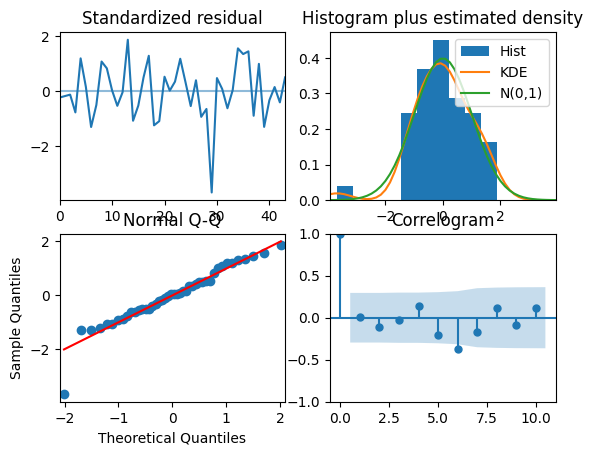

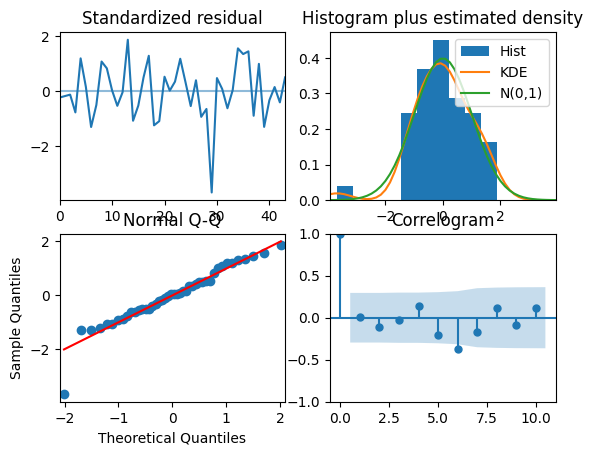

In [14]:
arima_model.plot_diagnostics()

# Trying manual ARIMA

In [ ]:
import itertools
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df' is your DataFrame and contains 'SQALE_INDEX' and external regressors

# Define the ranges for d and D since we are manually iterating over these
d_range = D_range = range(0, 3)
s = 12  # Seasonal period

best_aic = np.inf
best_model_cfg = None
best_regressors = None

# Iterate over d and D values
for d in d_range:
    for D in D_range:
        # Use auto_arima to find the best p, q, P, Q given d and D
        try:
            auto_arima_model = auto_arima(df['SQALE_INDEX'], start_p=1, start_q=1,
                                          max_p=5, max_q=5, d=d, D=D, start_P=1, start_Q=1,
                                          max_P=2, max_Q=2, m=s, seasonal=True,
                                          stepwise=True, suppress_warnings=True,
                                          error_action='ignore', trace=False)

            # Extract the best ARIMA order and seasonal order found by auto_arima
            p, q = auto_arima_model.order[0], auto_arima_model.order[2]
            P, Q = auto_arima_model.seasonal_order[0], auto_arima_model.seasonal_order[2]
            
            print(f"Best p, q combination: {p} {q} - Seasonal: {P} {Q}")
            print(f"d: {d}, D: {D}")
            # Begin backward selection of regressors
            current_regressors = df.iloc[:, 2:].columns.tolist()
            while current_regressors:
                tmp_X = df[current_regressors]
                model = SARIMAX(df['SQALE_INDEX'], exog=tmp_X, order=(p, d, q),
                                seasonal_order=(P, D, Q, s),
                                enforce_stationarity=True, enforce_invertibility=True)
                results = model.fit(disp=0)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model_cfg = ((p, d, q), (P, D, Q, s))
                    best_regressors = current_regressors.copy()

                if len(current_regressors) > 1:
                    aic_with_regressor_removed = []
                    for regressor in current_regressors:
                        try_regressors = current_regressors.copy()
                        try_regressors.remove(regressor)
                        tmp_X_try = df[try_regressors]
                        model_try = SARIMAX(df['SQALE_INDEX'], exog=tmp_X_try, order=(p, d, q),
                                            seasonal_order=(P, D, Q, s),
                                            enforce_stationarity=True, enforce_invertibility=True)
                        results_try = model_try.fit(disp=0)
                        aic_with_regressor_removed.append((results_try.aic, regressor))
                    aic_with_regressor_removed.sort()
                    current_regressors.remove(aic_with_regressor_removed[0][1])
                else:
                    break  # Stop if only one regressor left
                print(f"Number of remaining predictors: {len(current_regressors)}")
        except Exception as e:
            print(f"Error with configuration: {(d, D)} - {str(e)}")
            continue

print(f"Best SARIMAX{best_model_cfg} - AIC:{best_aic} with regressors {best_regressors}")

In [7]:
best_model_cfg

((0, 2, 1), (0, 2, 1, 12))

In [14]:
best_model_cfg[0][2]

((0, 2, 1), (0, 2, 1, 12))

In [26]:
results_try.bic

392.6293578636045

# Trying Python's OLS function

In [2]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/biweekly_data/archiva.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index)*0.8)
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [11]:
len(xregresors_names)

15

In [12]:
training_xregressors = sm.add_constant(training_xregressors)
olsmod = sm.OLS(training_sqale, training_xregressors).fit()

In [14]:
print(olsmod.summary())
print(olsmod.aic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     855.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.27e-23
Time:                        11:53:22   Log-Likelihood:                -315.28
No. Observations:                  35   AIC:                             662.6
Df Residuals:                      19   BIC:                             687.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7506.4735   7610.689     -0.986      0.3

# Fixing SARIMAX error

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def model_testing(training_df, testing_df, best_model_cfg, best_regressors):
    """
    Given the best model order parameters obtained from the backward variable selection and aut_arima tuning we
    fit the SARIMAX model for forecasting
    """

    arima_order = best_model_cfg[0]
    s_order = best_model_cfg[1]

    predictions = []

    for i in range(len(testing_df)):
        # Training the SARIMAX model
        X_train = training_df[best_regressors]
        y_train = training_df['SQALE_INDEX']

        # Model fitting
        model = SARIMAX(y_train, exog=X_train, order=arima_order, seasonal_order=s_order,
                        enforce_stationarity=True, enforce_invertibility=True)
        fitted_model = model.fit(disp=0)
        print(f"model fit {i} times")

        # Model forecasting
        best_reg_df = testing_df[best_regressors]
        X_test = best_reg_df.iloc[i, :].values.reshape(1, -1)
        y_pred = fitted_model.forecast(exog=X_test)
        predictions.append(y_pred.values[0])

        # Expand the training data for next iteration
        new_obs = testing_df.iloc[i, :]
        training_df = pd.concat([training_df, new_obs], ignore_index=True)

    return predictions, round(fitted_model.aic, 2), round(fitted_model.bic, 2)

split_point = round(len(sqale_index)*0.8)  # Initial data splitting. (80% training 20% testing)
training_df = df.iloc[:split_point, :]
testing_df = df.iloc[split_point:, :]
a, b, c = model_testing(training_df, testing_df, ((0, 1, 1), (3, 1, 0, 26)), ['S1213', 'S00122', 'S1488', 'S1905', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1151', 'S1132'])

/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model fit 0 times


MissingDataError: exog contains inf or nans

In [3]:
from selenium import webdriver
from selenium.webdriver import FirefoxOptions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


service = webdriver.FirefoxService(executable_path="/usr/bin/geckodriver")
# print(service)

opts = FirefoxOptions()
opts.add_argument("--headless")
driver = webdriver.Firefox(service=service, options=opts)
# driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())


#try:
# Navigate to the page
driver.get(" https://doi.org/10.1109/icact.2005.246060")
element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CLASS_NAME, "section")))
elements = driver.find_elements(By.CLASS_NAME, 'section')
for element in elements:
    print(element.text.split('\n'))

ModuleNotFoundError: No module named 'selenium'

# Checking sample data shape

In [4]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/biweekly_data/archiva.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index)*0.8)
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [8]:
df_S1213_log = np.log1p(df.S1213)

<Axes: >

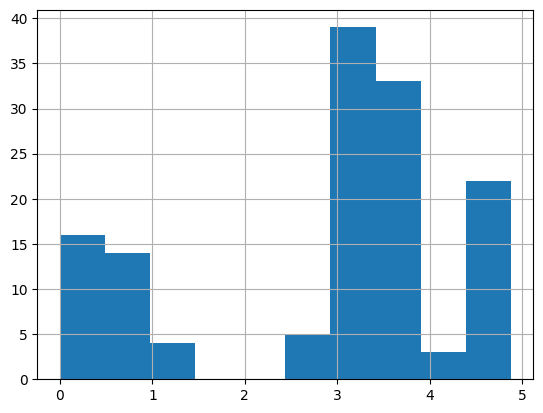

In [9]:
df_S1213_log.hist()

In [22]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler(feature_range=(0,1))
df_S1213_log = scaler.fit_transform(df.S1213.to_numpy().reshape(-1,1))

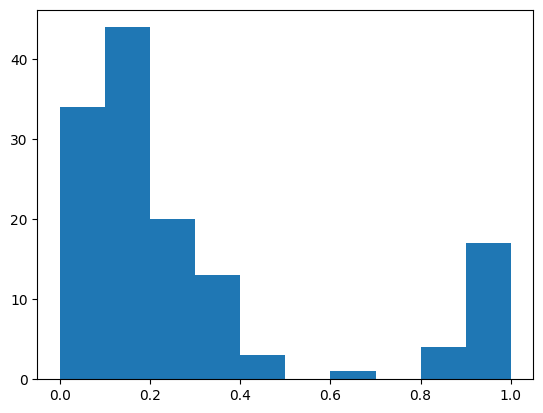

In [25]:
plt.hist(df_S1213_log, bins='auto')
plt.show()

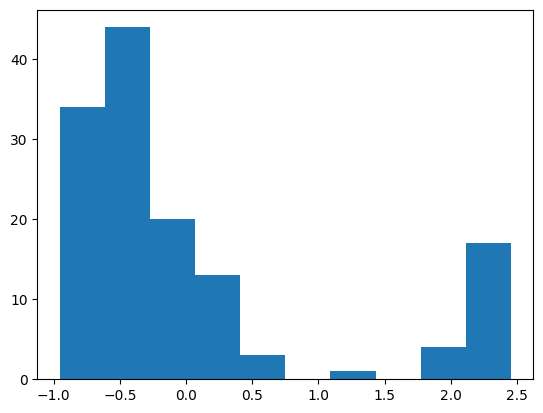

In [27]:
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
df_scaled = z_scaler.fit_transform(df_S1213_log)
plt.hist(df_scaled, bins='auto')
plt.show()

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

def model_testing(training_df, testing_df, best_model_cfg, best_regressors):
    """
    Given the best model order parameters obtained from the backward variable selection and aut_arima tuning we
    fit the SARIMAX model for forecasting
    """

    arima_order = best_model_cfg[0]
    s_order = best_model_cfg[1]

    predictions = []

    for i in range(len(testing_df)):
        # Training the SARIMAX model
        X_train = training_df[best_regressors]
        y_train = training_df['SQALE_INDEX']
        # X_train_scaled = np.log1p(X_train)
        scaler = MinMaxScaler(feature_range=(0,1))
        X_train_scaled = scaler.fit_transform(X_train)
         
        # Model fitting
        model = SARIMAX(y_train, exog=X_train_scaled, order=arima_order, seasonal_order=s_order,
                        enforce_stationarity=True, enforce_invertibility=True, maxiter=100)
        fitted_model = model.fit(maxiter=100)
        print(f"model fit {i} times")

        # Model forecasting
        best_reg_df = testing_df[best_regressors]
        best_reg_df_scaled = np.log1p(best_reg_df)
        X_test = best_reg_df_scaled.iloc[i, :].values.reshape(1, -1)
        y_pred = fitted_model.forecast(exog=X_test)
        predictions.append(y_pred.values[0])

        # Expand the training data for next iteration
        new_obs = testing_df.iloc[i, :]
        training_df = pd.concat([training_df, new_obs], ignore_index=True)

    return predictions, round(fitted_model.aic, 2), round(fitted_model.bic, 2)

best_model_params = (1, 0, 1), (2, 3, 0, 26)
best_aic = -144.89
best_regressors = ['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1155',
                   'S1151', 'S1132']
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/biweekly_data/archiva.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)
training_df = df.iloc[:split_point, :]
testing_df = df.iloc[split_point:, :]

predictions, aic_val, bic_val = model_testing(training_df=training_df, testing_df=testing_df,
                                              best_model_cfg=best_model_params, best_regressors=best_regressors)

/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81418D+00    |proj g|=  6.21554D+00

At iterate    5    f=  3.29375D+00    |proj g|=  8.99417D-02

At iterate   10    f=  3.15456D+00    |proj g|=  2.65683D-02

At iterate   15    f=  3.11818D+00    |proj g|=  7.09522D-03

At iterate   20    f=  3.10544D+00    |proj g|=  6.22147D-03

At iterate   25    f=  3.10303D+00    |proj g|=  8.65650D-04

At iterate   30    f=  3.10267D+00    |proj g|=  1.37046D-04

At iterate   35    f=  3.10262D+00    |proj g|=  1.85806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


model fit 0 times


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


MissingDataError: exog contains inf or nans